In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
data = pd.read_csv('https://www.datos.gov.co/resource/y628-5q9a.csv')
data.head(5)

,fecha_accidente,direccion_accidente,condicion_victima,gravedad_accidente,clase_accidente,sexo_victima,edad_victima,cantidad_victimas
0,2018-01-01T00:00:00.000,CL 87 9H 24,Peaton,herido,Atropello,M,57.0,1.0
1,2018-01-01T00:00:00.000,CLLE 119B CRA 11B,Peaton,herido,Atropello,F,13.0,1.0
2,2018-01-01T00:00:00.000,CR 8 CL 41,Acompañante,herido,Choque,F,32.0,1.0
3,2018-01-01T00:00:00.000,CR 8 CL 41,Conductor,herido,Choque,M,26.0,1.0
4,2018-01-01T00:00:00.000,CR 8 CL 41,Motociclista,herido,Choque,M,53.0,1.0


,edad_victima,cantidad_victimas
count,1000.000000,1000.000000
mean,35.979000,1.009000
std,64.461196,0.104546
min,0.000000,1.000000
25%,24.000000,1.000000
50%,31.000000,1.000000
75%,42.000000,1.000000
max,2018.000000,3.000000


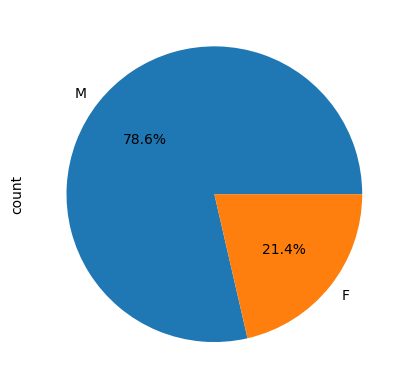

In [64]:
data['sexo_victima'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
data.describe()

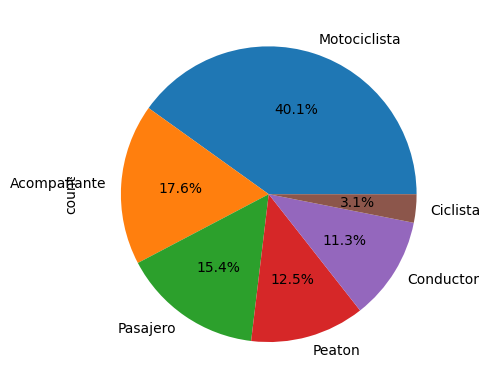

In [92]:
data['condicion_victima'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

In [49]:
data['sexo_victima'].describe()

count     1000
unique       2
top          M
freq       786
Name: sexo_victima, dtype: object

In [53]:
data['gravedad_accidente'].value_counts()

gravedad_accidente
herido    980
muerto     20
Name: count, dtype: int64

In [89]:
data['condicion_victima'].value_counts()

condicion_victima
Motociclista    401
Acompañante     176
Pasajero        154
Peaton          125
Conductor       113
Ciclista         31
Name: count, dtype: int64

In [61]:
tabla_cruzada = pd.crosstab(data['clase_accidente'], data['sexo_victima'])
tabla_cruzada

sexo_victima,F,M
clase_accidente,,
Atropello,30,112
Caida Ocupante,6,11
Choque,173,655
Otro,2,3
Volcamiento,3,5


In [48]:
tabla_cruzada1 = pd.crosstab(data['sexo_victima'], data['gravedad_accidente'])
tabla_cruzada1

gravedad_accidente,herido,muerto
sexo_victima,,
F,212,2
M,768,18


In [43]:
#Heridos menores de edad
data1 = data[(data['edad_victima']<18)&(data['gravedad_accidente']=='muerto')]
data1

,fecha_accidente,direccion_accidente,condicion_victima,gravedad_accidente,clase_accidente,sexo_victima,edad_victima,cantidad_victimas


In [45]:
#Mujeres fallecidas
data2 = data[(data['sexo_victima']=='F')&(data['gravedad_accidente']=='muerto')]
data2

,fecha_accidente,direccion_accidente,condicion_victima,gravedad_accidente,clase_accidente,sexo_victima,edad_victima,cantidad_victimas
447,2018-03-07T00:00:00.000,CALLE 31 CARRERA 40,Peaton,muerto,Atropello,F,18.0,1.0
903,2018-05-09T00:00:00.000,CALLE 30 CARRERA 29,Peaton,muerto,Atropello,F,55.0,1.0


In [87]:
#adultos mayores (Hombres) heridos
data3 = data[(data['sexo_victima']=='M')&(data['gravedad_accidente']=='herido')&(data['edad_victima']>60)&(data['edad_victima']<2019)]
len(data3)
data3.head(2)

,fecha_accidente,direccion_accidente,condicion_victima,gravedad_accidente,clase_accidente,sexo_victima,edad_victima,cantidad_victimas
13,2018-01-04T00:00:00.000,CR 17 CL 36B,Peaton,herido,Atropello,M,75.0,1.0
32,2018-01-07T00:00:00.000,CLLE 39 CRA 26B,Conductor,herido,Choque,M,64.0,1.0


In [88]:
data4 = data3[(data3['condicion_victima']=='Peaton')]
data4.head(2)

,fecha_accidente,direccion_accidente,condicion_victima,gravedad_accidente,clase_accidente,sexo_victima,edad_victima,cantidad_victimas
13,2018-01-04T00:00:00.000,CR 17 CL 36B,Peaton,herido,Atropello,M,75.0,1.0
42,2018-01-09T00:00:00.000,CLLE 42 CRA 41,Peaton,herido,Atropello,M,62.0,1.0


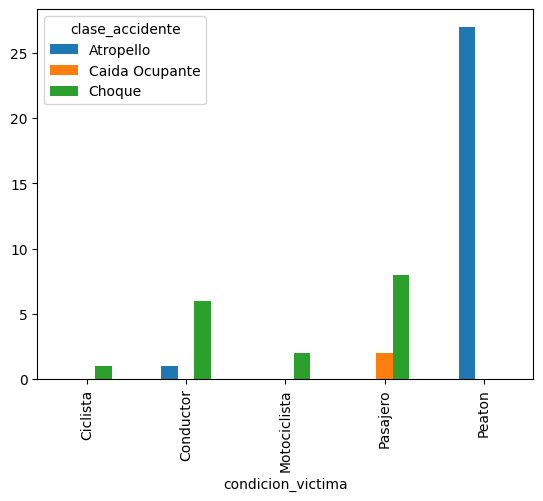

In [73]:
tabla_cruzada2 = pd.crosstab(data3['condicion_victima'], data3['clase_accidente'])
tabla_cruzada2.plot(kind = 'bar')
plt.show()

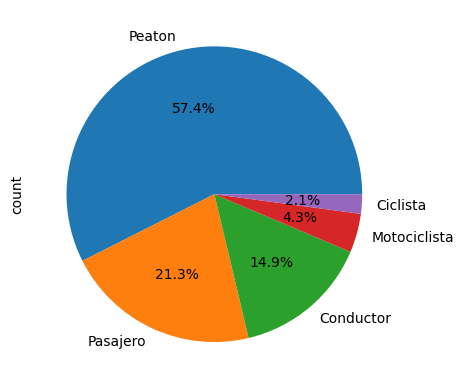

In [78]:
data3['condicion_victima'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()

In [93]:
tabla_cruzada = pd.crosstab(data['condicion_victima'], data['sexo_victima'])
tabla_cruzada

sexo_victima,F,M
condicion_victima,,
Acompañante,72,104
Ciclista,3,28
Conductor,16,97
Motociclista,31,370
Pasajero,57,97
Peaton,35,90
